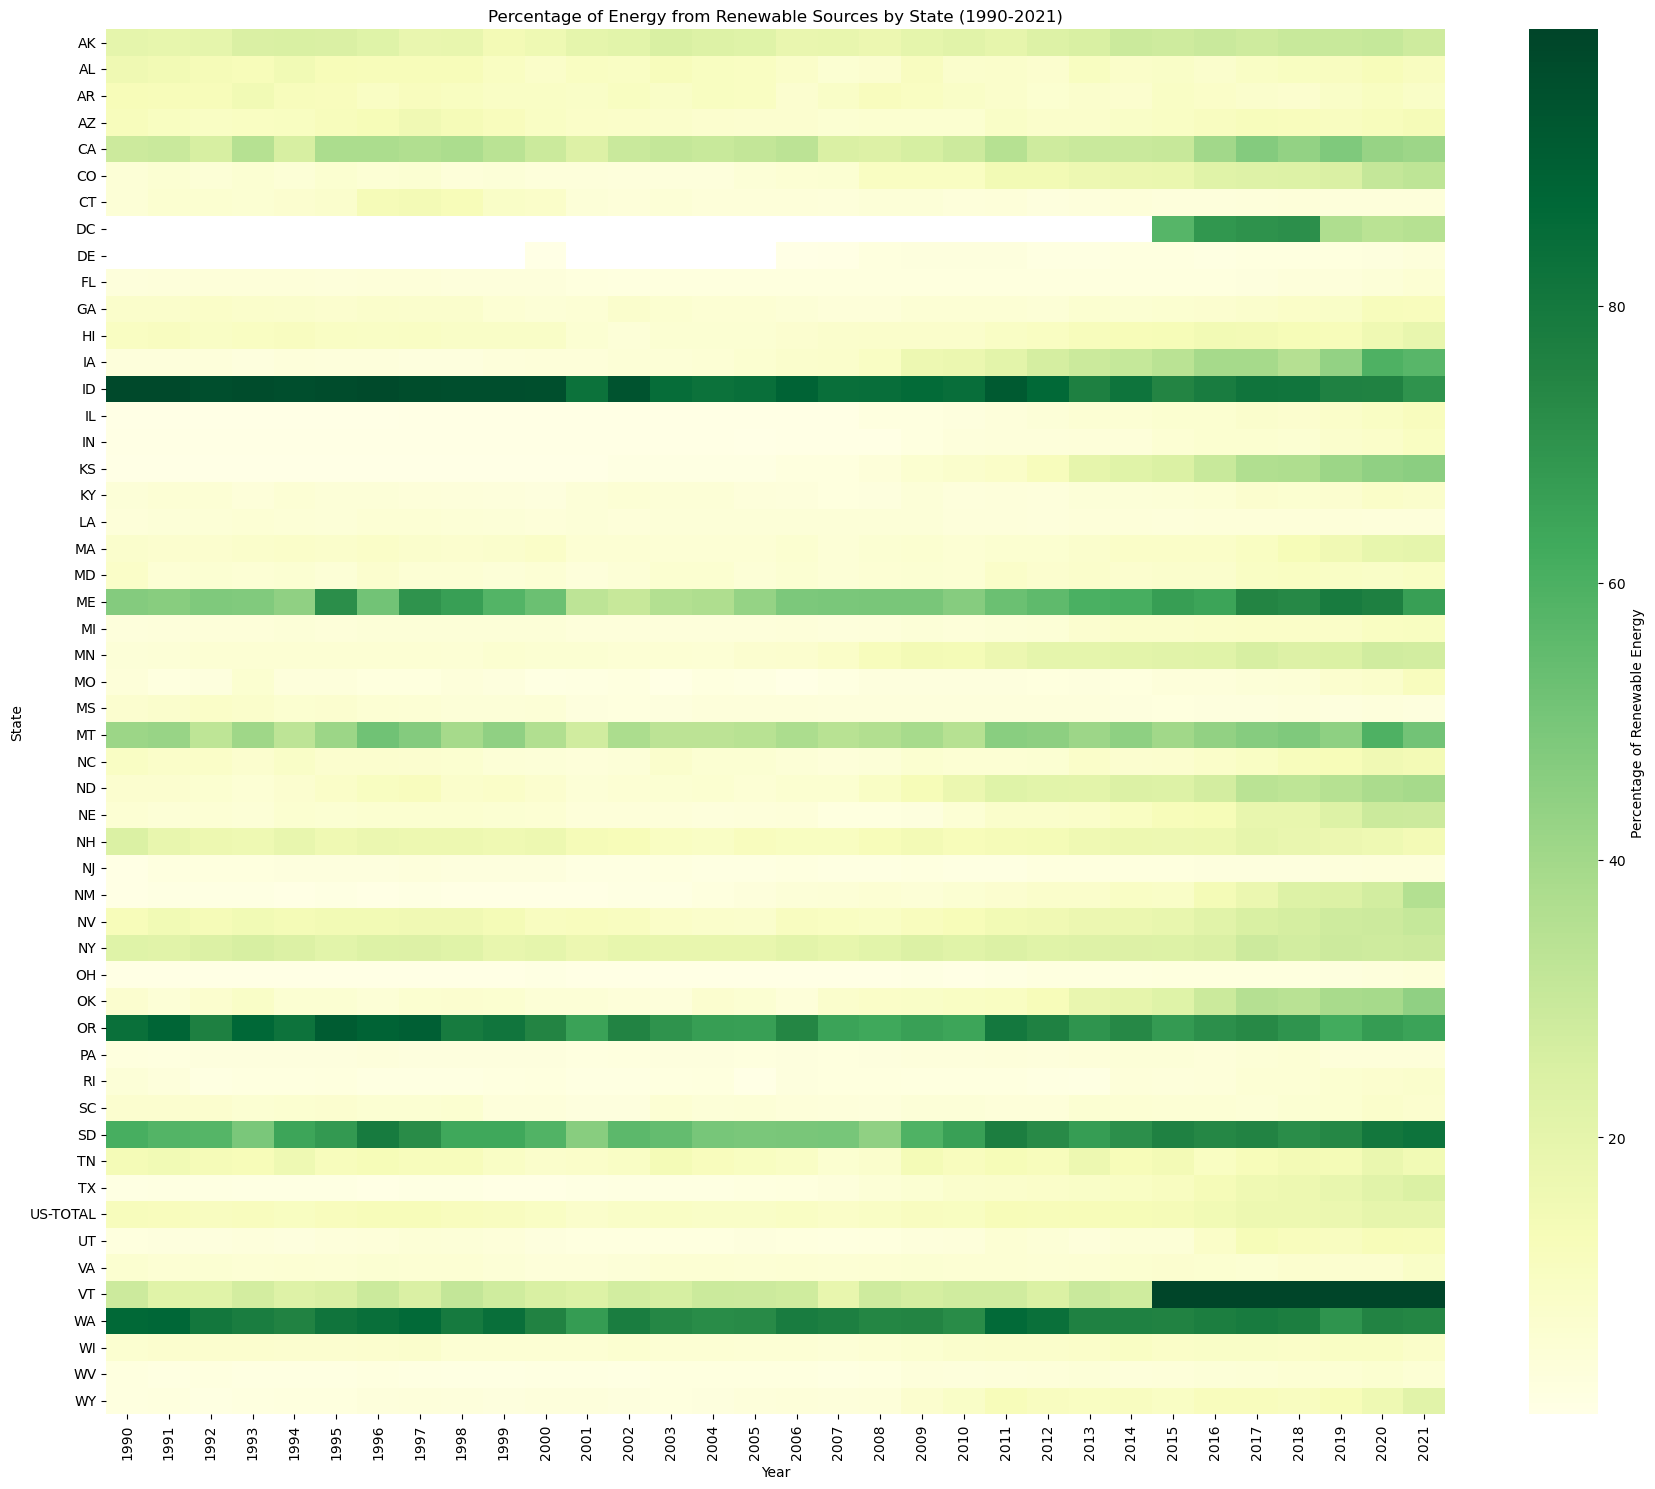

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
data = pd.read_csv('Data\state_electricity_production_cleaned.csv')

# List of renewable energy sources
renewable_sources = ["Hydroelectric Conventional", "Wind", "Wood and Wood Derived Fuels", 
                     "Other Biomass", "Geothermal", "Solar Thermal and Photovoltaic"]

# Filter the dataset for the renewable energy sources
renewable_data = data[data["ENERGY SOURCE"].isin(renewable_sources)]

# Sum the generation from renewable sources for each state and year
renewable_generation = renewable_data.groupby(["YEAR", "STATE"])["GENERATION (Megawatthours)"].sum().reset_index()

# Extract the total energy generation for each state and year from the "Total" in the ENERGY SOURCE column
total_generation = data[data["ENERGY SOURCE"] == "Total"][["YEAR", "STATE", "GENERATION (Megawatthours)"]]

# Merge the renewable generation with the corrected total generation
merged_data = pd.merge(renewable_generation, total_generation, on=["YEAR", "STATE"], suffixes=('_renewable', '_total'))

# Compute the percentage of energy from renewable sources
merged_data["percentage_renewable"] = (merged_data["GENERATION (Megawatthours)_renewable"] / merged_data["GENERATION (Megawatthours)_total"]) * 100

# Pivot the data for heatmap
heatmap_data = merged_data.pivot(index="STATE", columns="YEAR", values="percentage_renewable")

# Plotting
plt.figure(figsize=(18, 15))
sns.heatmap(heatmap_data, cmap="YlGn", cbar_kws={'label': 'Percentage of Renewable Energy'})
plt.title("Percentage of Energy from Renewable Sources by State (1990-2021)")
plt.ylabel("State")
plt.xlabel("Year")
plt.tight_layout()
plt.show()
